In [40]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# import seaborn as sns
import contextily as cx

In [41]:
trx01_df = pd.read_csv('./data/transit_dfs/TRX01_df.csv', low_memory=False, header=1)
trx02_df = pd.read_csv('./data/transit_dfs/TRX02_df.csv', low_memory=False, header=1)
trx03_df = pd.read_csv('./data/transit_dfs/TRX03_df.csv', low_memory=False, header=1)

transit_df = pd.concat([trx01_df, trx02_df, trx03_df])

transit_overall_df = transit_df.groupby(['Latitude_ddeg', 'Longitude_ddeg'])
transit_overall_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,13,20,TRX01,Good,< 12.00,4.00 - 6.00
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,14,20,TRX01,Good,< 12.00,4.00 - 6.00
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,15,20,TRX01,Good,< 12.00,6.00 - 8.00
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,16,20,TRX01,Good,< 12.00,4.00 - 6.00
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,17,20,TRX01,Good,< 12.00,6.00 - 8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173711,2023-08-05 06:16:32,40.631458,-111.902634,1312.2,13.40,25.64,23.42,32.72,0.0,2.0,...,2023,8,217,5,16,6,TRX03,Good,< 12.00,< 2.00
1173712,2023-08-05 06:17:32,40.629498,-111.904694,1318.9,13.40,25.64,23.49,33.33,0.0,2.0,...,2023,8,217,5,17,6,TRX03,Good,< 12.00,< 2.00
1173725,2023-08-05 06:30:32,40.628166,-111.904274,1322.0,13.43,25.34,21.84,37.51,0.0,2.0,...,2023,8,217,5,30,6,TRX03,Good,< 12.00,< 2.00
1173726,2023-08-05 06:31:32,40.628139,-111.904289,1321.9,13.42,25.31,21.80,37.51,0.0,2.0,...,2023,8,217,5,31,6,TRX03,Good,< 12.00,< 2.00


In [42]:
transit_summer_df = transit_df[transit_df['Month'].isin([4, 5, 6, 7, 8])]
transit_summer_df = transit_summer_df.groupby(['Latitude_ddeg', 'Longitude_ddeg'])
transit_summer_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
147680,2019-04-01 00:00:00,40.555222,-112.024574,1514.0,13.65,20.00,-9999.00,-9999.00,2.0,2.0,...,2019,4,91,1,0,0,TRX01,Good,< 12.00,2.00 - 4.00
147681,2019-04-01 00:01:00,40.549229,-112.019196,1485.6,13.64,19.97,-9999.00,-9999.00,2.0,2.0,...,2019,4,91,1,1,0,TRX01,Good,< 12.00,2.00 - 4.00
147682,2019-04-01 00:02:00,40.544216,-112.014351,1456.4,13.65,19.92,-9999.00,-9999.00,3.0,2.0,...,2019,4,91,1,2,0,TRX01,Good,< 12.00,2.00 - 4.00
147683,2019-04-01 00:03:00,40.544216,-112.014351,1456.1,13.66,19.86,-9999.00,-9999.00,3.0,2.0,...,2019,4,91,1,3,0,TRX01,Good,< 12.00,2.00 - 4.00
147684,2019-04-01 00:04:00,40.544216,-112.014351,1456.1,13.66,19.84,-9999.00,-9999.00,3.0,2.0,...,2019,4,91,1,4,0,TRX01,Good,< 12.00,2.00 - 4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173882,2023-08-05 09:29:34,40.627968,-111.905830,1318.0,13.57,21.40,20.05,48.19,0.0,2.0,...,2023,8,217,5,29,9,TRX03,Good,< 12.00,< 2.00
1173883,2023-08-05 09:30:34,40.627968,-111.905830,1318.1,13.57,21.37,19.78,47.85,0.0,2.0,...,2023,8,217,5,30,9,TRX03,Good,< 12.00,< 2.00
1173899,2023-08-05 09:46:34,40.627979,-111.905807,1319.4,13.56,21.07,19.92,46.17,0.0,2.0,...,2023,8,217,5,46,9,TRX03,Good,< 12.00,< 2.00
1173903,2023-08-05 09:50:34,40.627979,-111.905807,1319.8,13.57,21.02,19.78,49.77,0.0,2.0,...,2023,8,217,5,50,9,TRX03,Good,< 12.00,< 2.00


In [43]:
transit_winter_df = transit_df[transit_df['Month'].isin([10, 11, 12, 1, 2, 3])]
transit_winter_df = transit_winter_df.groupby(['Latitude_ddeg', 'Longitude_ddeg'])
transit_winter_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,13,20,TRX01,Good,< 12.00,4.00 - 6.00
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,14,20,TRX01,Good,< 12.00,4.00 - 6.00
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,15,20,TRX01,Good,< 12.00,6.00 - 8.00
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,16,20,TRX01,Good,< 12.00,4.00 - 6.00
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,17,20,TRX01,Good,< 12.00,6.00 - 8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053337,2023-03-31 23:50:06,40.633137,-111.898331,1311.8,13.98,11.82,32.86,8.90,0.0,2.0,...,2023,3,90,31,50,23,TRX03,Good,< 12.00,< 2.00
1053338,2023-03-31 23:52:06,40.618847,-111.898354,1328.2,13.98,11.79,32.92,8.86,0.0,2.0,...,2023,3,90,31,52,23,TRX03,Good,< 12.00,< 2.00
1053339,2023-03-31 23:54:06,40.607128,-111.889610,1334.9,13.98,11.77,35.18,8.96,0.0,2.0,...,2023,3,90,31,54,23,TRX03,Good,< 12.00,< 2.00
1053340,2023-03-31 23:56:06,40.589130,-111.885750,1353.5,13.97,11.77,36.77,8.90,0.0,2.0,...,2023,3,90,31,56,23,TRX03,Good,< 12.00,< 2.00


In [44]:
pm25_avg = transit_overall_df['ES642_PM2.5_Concentration_ug/m3'].mean()
pm25_avg = pm25_avg.reset_index()
pm25_avg_ns = pm25_avg.sort_values(by='Longitude_ddeg', ascending=True)
pm25_avg_ns['State_St_Lat'] = 40.760643

summer_pm25_avg = transit_summer_df['ES642_PM2.5_Concentration_ug/m3'].mean()
summer_pm25_avg = summer_pm25_avg.reset_index()
summer_pm25_avg_ns = summer_pm25_avg.sort_values(by='Longitude_ddeg', ascending=True)
summer_pm25_avg_ns['State_St_Lat'] = 40.760643

winter_pm25_avg = transit_winter_df['ES642_PM2.5_Concentration_ug/m3'].mean()
winter_pm25_avg = winter_pm25_avg.reset_index()
winter_pm25_avg_ns = winter_pm25_avg.sort_values(by='Longitude_ddeg', ascending=True)
winter_pm25_avg_ns['State_St_Lat'] = 40.760643

In [45]:
from geopy.distance import geodesic
import numpy as np

pm25_avg_ns['Distance_km'] = pm25_avg_ns.apply(lambda row: geodesic((40.760643, pm25_avg_ns['Longitude_ddeg'].iloc[0]), (row['State_St_Lat'], row['Longitude_ddeg'])).km, axis=1)

pm25_avg_ns['Distance_Bin'] = pd.cut(pm25_avg_ns['Distance_km'], bins=np.arange(pm25_avg_ns['Distance_km'].min(), pm25_avg_ns['Distance_km'].max() + 0.1, 0.1))

summer_pm25_avg_ns['Distance_km'] = summer_pm25_avg_ns.apply(lambda row: geodesic((40.760643, summer_pm25_avg_ns['Longitude_ddeg'].iloc[0]), (row['State_St_Lat'], row['Longitude_ddeg'])).km, axis=1)

summer_pm25_avg_ns['Distance_Bin'] = pd.cut(summer_pm25_avg_ns['Distance_km'], bins=np.arange(summer_pm25_avg_ns['Distance_km'].min(), summer_pm25_avg_ns['Distance_km'].max() + 0.1, 0.1))

winter_pm25_avg_ns['Distance_km'] = winter_pm25_avg_ns.apply(lambda row: geodesic((40.760643, winter_pm25_avg_ns['Longitude_ddeg'].iloc[0]), (row['State_St_Lat'], row['Longitude_ddeg'])).km, axis=1)

winter_pm25_avg_ns['Distance_Bin'] = pd.cut(winter_pm25_avg_ns['Distance_km'], bins=np.arange(winter_pm25_avg_ns['Distance_km'].min(), winter_pm25_avg_ns['Distance_km'].max() + 0.1, 0.1))

In [46]:
pm25_avg_ns_dist = pm25_avg_ns.groupby(['Distance_Bin'], observed=True)['ES642_PM2.5_Concentration_ug/m3'].mean()
pm25_avg_ns_dist = pm25_avg_ns_dist.reset_index()
pm25_avg_ns_dist['Distance_Bin_First'] = pm25_avg_ns_dist['Distance_Bin'].apply(lambda x: x.left)

summer_pm25_avg_ns_dist = summer_pm25_avg_ns.groupby(['Distance_Bin'], observed=True)['ES642_PM2.5_Concentration_ug/m3'].mean()
summer_pm25_avg_ns_dist = summer_pm25_avg_ns_dist.reset_index()
summer_pm25_avg_ns_dist['Distance_Bin_First'] = summer_pm25_avg_ns_dist['Distance_Bin'].apply(lambda x: x.left)

winter_pm25_avg_ns_dist = winter_pm25_avg_ns.groupby(['Distance_Bin'], observed=True)['ES642_PM2.5_Concentration_ug/m3'].mean()
winter_pm25_avg_ns_dist = winter_pm25_avg_ns_dist.reset_index()
winter_pm25_avg_ns_dist['Distance_Bin_First'] = winter_pm25_avg_ns_dist['Distance_Bin'].apply(lambda x: x.left)

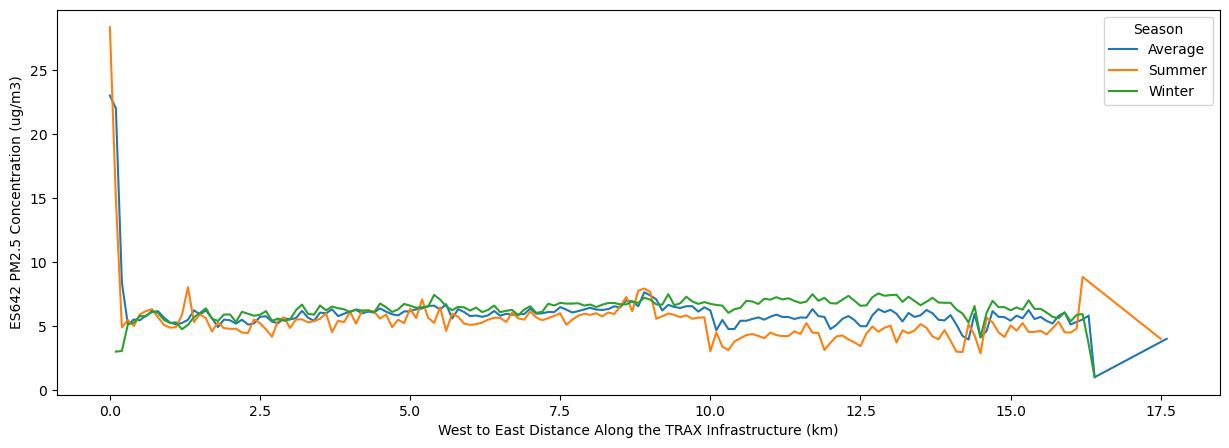

In [47]:
pm25_avg_ns_dist = pm25_avg_ns_dist.replace([np.inf, -np.inf], np.nan)
summer_pm25_avg_ns_dist = summer_pm25_avg_ns_dist.replace([np.inf, -np.inf], np.nan)
winter_pm25_avg_ns_dist = winter_pm25_avg_ns_dist.replace([np.inf, -np.inf], np.nan)

pm25_avg_ns_dist = pm25_avg_ns_dist.dropna()
summer_pm25_avg_ns_dist = summer_pm25_avg_ns_dist.dropna()
winter_pm25_avg_ns_dist = winter_pm25_avg_ns_dist.dropna()

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(pm25_avg_ns_dist['Distance_Bin_First'], pm25_avg_ns_dist['ES642_PM2.5_Concentration_ug/m3'], label='Average')
ax.plot(summer_pm25_avg_ns_dist['Distance_Bin_First'], summer_pm25_avg_ns_dist['ES642_PM2.5_Concentration_ug/m3'], label='Summer')
ax.plot(winter_pm25_avg_ns_dist['Distance_Bin_First'], winter_pm25_avg_ns_dist['ES642_PM2.5_Concentration_ug/m3'], label='Winter')

ax.set_xlabel('West to East Distance Along the TRAX Infrastructure (km)')
ax.set_ylabel('ES642 PM2.5 Concentration (ug/m3)')
ax.legend(title='Season')

plt.show()